In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astroquery.jplhorizons import Horizons
from astropy import units as u
from astropy import constants as cts
import GaussMethod as gm

au = cts.au.to(u.Unit('km')).value
mu_Sun = cts.GM_sun.to(u.Unit('au3 / day2')).value
c_light = cts.c.to(u.Unit('au/day'))

# Testing with Ceres

In [2]:
coord1 = SkyCoord(ra=185.89929*u.deg, dec=7.18812*u.deg)
coord2 = SkyCoord(ra= 192.20026*u.deg, dec=2.83528*u.deg)
coord3 = SkyCoord(ra=200.07901*u.deg, dec=-1.81969*u.deg)

t1 = Time("2023-07-02T06:53:11.616", format='isot', scale='ut1')
t2 = Time("2023-07-26T06:53:11.616", format='isot', scale='ut1')
t3 = Time("2023-08-20T06:53:11.616", format='isot', scale='ut1')

Earth = Horizons(id='399', location='500@0', epochs=[t1.jd, t2.jd, t3.jd])
Rvectors = Earth.vectors(refplane="earth") # refplane="earth"

R1 = np.array([Rvectors["x"][0], Rvectors["y"][0], Rvectors["z"][0]])
R2 = np.array([Rvectors["x"][1], Rvectors["y"][1], Rvectors["z"][1]])
R3 = np.array([Rvectors["x"][2], Rvectors["y"][2], Rvectors["z"][2]]) 

obs_radec = np.array([coord1, coord2, coord3])
obs_t = np.array([t1, t2, t3])
R = np.array([R1, R2, R3])

r1, r2, r3, v2, D, rho1, rho2, rho3, tau1, tau3, f1, g1, f3, g3, rho_1_sr, rho_2_sr, rho_3_sr = gm.gauss_method_core(obs_radec, obs_t, R, mu_Sun, r2_root_ind=0)
r1, r2, r3, v2, rho_1_sr, rho_2_sr, rho_3_sr, f_1_new, g_1_new, f_3_new, g_3_new, refinement_success = gm.gauss_refinement(mu_Sun, tau1, tau3, r2, v2, 10**(-3), D, R, rho1, rho2, rho3, f1, g1, f3, g3)
a, e, i, o, w, M = gm.orbital_elements(r2, v2)

print(" ")
print("-----")
print("Semi-mayor axis: ", np.round(a, 3))
print("error a: ", np.round(np.abs(a - 2.76)/(2.76)*100, 3))
print("-----")
print("Eccentricity: ", np.round(e, 3))
print("error e: ", np.round(np.abs(e - 0.08)/(0.08)*100, 3))
print("-----")
print("Inclination: ", np.round(i, 3))
print("error I: ", np.round(np.abs(i - 27.19)/(27.19)*100, 3))
print("-----")
print("o: ", np.round(o, 3))
print("error o: ", np.round(np.abs(o - 23.35)/(23.35)*100, 3))
print("-----")
print("w: ", np.round(w, 3))
print("error w: ", np.round(np.abs(w - 132.53)/(132.53)*100, 3))
print("-----")
print("M: ", np.round(M, 3))
print("error M: ", np.round(np.abs(M - 49.63)/(49.63)*100, 3))

Number of solutions =  3
Real solutions =  [2.64794063 1.13472088 0.99480953]
r2_root index =  0
 
r2_star =  2.6479406280208155
 
 
-----
Semi-mayor axis:  2.804
error a:  1.581
-----
Eccentricity:  0.084
error e:  5.093
-----
Inclination:  27.199
error I:  0.032
-----
o:  23.28
error o:  0.298
-----
w:  298.35
error w:  125.119
-----
M:  44.86
error M:  9.61


# Testing with real observations

In [3]:
coord1 = SkyCoord(ra=264.496*u.deg, dec=-24.906182*u.deg)
coord2 = SkyCoord(ra=264.639*u.deg, dec=-22.779707*u.deg)
coord3 = SkyCoord(ra=264.926*u.deg, dec=-21.790782*u.deg)

t1 = Time("2458671.778", format='jd')
t2 = Time("2458679.772", format='jd')
t3 = Time("2458683.774", format='jd')

Earth = Horizons(id='399', location='500@0', epochs=[t1.jd, t2.jd, t3.jd])
Rvectors = Earth.vectors(refplane="earth") # refplane="earth"

R1 = np.array([Rvectors["x"][0], Rvectors["y"][0], Rvectors["z"][0]])
R2 = np.array([Rvectors["x"][1], Rvectors["y"][1], Rvectors["z"][1]])
R3 = np.array([Rvectors["x"][2], Rvectors["y"][2], Rvectors["z"][2]]) 

obs_t = np.array([t1, t2, t3])
R = np.array([R1, R2, R3])

# perturbation
np.random.seed(4)

N_pert = 10000

#error_dec = 1.6 
error_dec = 0.0005

#error_ra = 0.11 / 5
error_ra = 15*0.000231

r2_pert = np.zeros((N_pert, 3))
v2_pert = np.zeros((N_pert, 3))
a_pert = np.zeros(N_pert)
e_pert = np.zeros(N_pert)
i_pert = np.zeros(N_pert)
o_pert = np.zeros(N_pert)
w_pert = np.zeros(N_pert)
M_pert = np.zeros(N_pert)

for i in range(N_pert):
    print(" ")
    print(i)
    ra1 = 264.496 + np.random.normal(0, error_ra, 1)
    ra2 = 264.639 + np.random.normal(0, error_ra, 1)
    ra3 = 264.926 + np.random.normal(0, error_ra, 1)
    dec1 = -24.906182 + np.random.normal(0, error_dec, 1)
    dec2 = -22.779707 + np.random.normal(0, error_dec, 1)
    dec3 = -21.790782 + np.random.normal(0, error_dec, 1)
    coor1 = SkyCoord(ra=(ra1[0])*u.deg, dec=(dec1[0])*u.deg)
    coor2 = SkyCoord(ra=(ra2[0])*u.deg, dec=(dec2[0])*u.deg)
    coor3 = SkyCoord(ra=(ra3[0])*u.deg, dec=(dec3[0])*u.deg)
    obs_radec = np.array([coor1, coor2, coor3])
    r1, r2_pert[i], r3, v2_pert[i], D, rho1, rho2, rho3, tau1, tau3, f1, g1, f3, g3, rho_1_sr, rho_2_sr, rho_3_sr = gm.gauss_method_core(obs_radec, obs_t, R, mu_Sun, r2_root_ind=0)
    r1, r2_pert[i], r3, v2_pert[i], rho_1_sr, rho_2_sr, rho_3_sr, f_1_new, g_1_new, f_3_new, g_3_new, refinement_success = gm.gauss_refinement(mu_Sun, tau1, tau3, r2_pert[i], v2_pert[i], 10**(-3), D, R, rho1, rho2, rho3, f1, g1, f3, g3)
    a_pert[i], e_pert[i], i_pert[i], o_pert[i], w_pert[i], M_pert[i] = gm.orbital_elements(r2_pert[i], v2_pert[i])

 
0
Number of solutions =  3
Real solutions =  [1.58609875 1.01522629 0.7238689 ]
r2_root index =  0
 
r2_star =  1.5860987506877524
 
 
1
Number of solutions =  3
Real solutions =  [1.57238249 1.01530637 0.72197308]
r2_root index =  0
 
r2_star =  1.572382488267703
 
 
2
Number of solutions =  3
Real solutions =  [1.58307847 1.01524392 0.72345516]
r2_root index =  0
 
r2_star =  1.583078471922518
 
 
3
Number of solutions =  3
Real solutions =  [1.5706323  1.01531787 0.72173468]
r2_root index =  0
 
r2_star =  1.5706322981369016
 
 
4
Number of solutions =  3
Real solutions =  [1.52777007 1.0155995  0.71564826]
r2_root index =  0
 
r2_star =  1.527770073120084
 
 
5
Number of solutions =  3
Real solutions =  [1.57640616 1.0152824  0.72253173]
r2_root index =  0
 
r2_star =  1.5764061645542016
 
 
6
Number of solutions =  3
Real solutions =  [1.57071614 1.01531709 0.72173873]
r2_root index =  0
 
r2_star =  1.5707161382584596
 
 
7
Number of solutions =  3
Real solutions =  [1.57194712

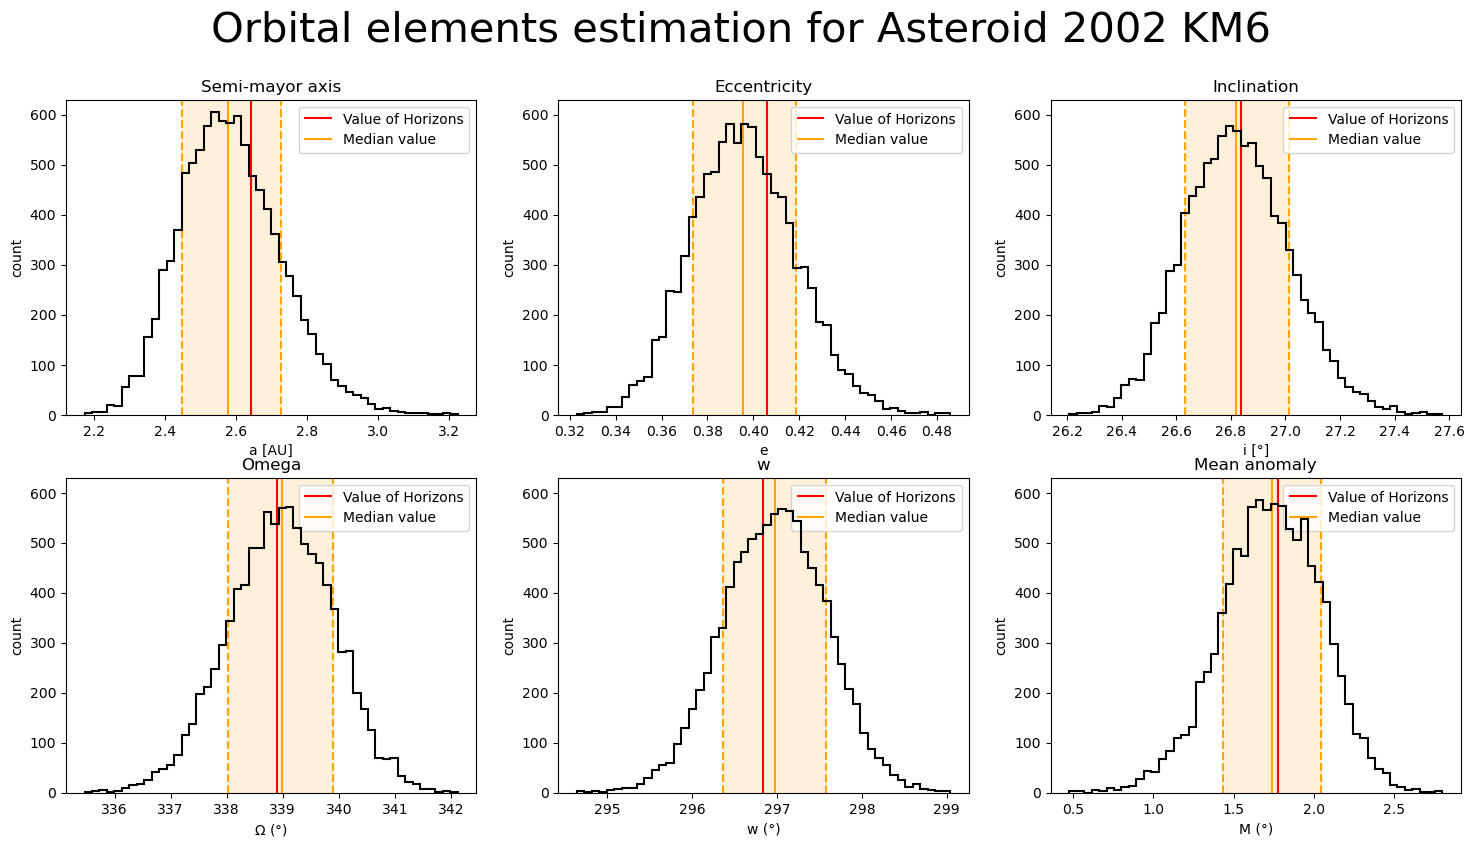

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

fig.suptitle("Orbital elements estimation for Asteroid 2002 KM6", fontsize=30)

max = 630
div = 200
variable = a_pert
ax[0, 0].hist(variable, bins=N_pert // div, color="k", fill=False, zorder=10, histtype='step', linewidth=1.5)
ax[0, 0].vlines(3.949722316466014E+08/au, 0, max, color="red", label="Value of Horizons")
ax[0, 0].vlines(np.median(variable), 0, max, color="orange", label="Median value")
ax[0, 0].set_title("Semi-mayor axis")
ax[0, 0].fill_between(np.linspace(np.percentile(variable, 16), np.percentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[0, 0].vlines(np.percentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[0, 0].vlines(np.percentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[0, 0].set_xlabel("a [AU]")
ax[0, 0].set_ylabel("count")
ax[0, 0].set_ylim(0, max)
ax[0, 0].legend()

variable = e_pert
ax[0, 1].hist(variable, bins=N_pert // div, color="k", fill=False, zorder=10, histtype='step', linewidth=1.5)
ax[0, 1].vlines(4.059007675097038E-01, 0, max, color="red", label="Value of Horizons")
ax[0, 1].vlines(np.median(variable), 0, max, color="orange", label="Median value")
ax[0, 1].set_title("Eccentricity")
ax[0, 1].fill_between(np.linspace(np.percentile(variable, 16), np.percentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[0, 1].vlines(np.percentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[0, 1].vlines(np.percentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[0, 1].set_xlabel("e")
ax[0, 1].set_ylabel("count")
ax[0, 1].set_ylim(0, max)
ax[0, 1].legend()

variable = i_pert
ax[0, 2].hist(variable, bins=N_pert // div, color="k", fill=False, zorder=10, histtype='step', linewidth=1.5)
ax[0, 2].vlines(2.683619904865604E+01, 0, max, color="red", label="Value of Horizons")
ax[0, 2].vlines(np.median(variable), 0, max, color="orange", label="Median value")
ax[0, 2].set_title("Inclination")
ax[0, 2].fill_between(np.linspace(np.percentile(variable, 16), np.percentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[0, 2].vlines(np.percentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[0, 2].vlines(np.percentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[0, 2].set_xlabel("i [°]")
ax[0, 2].set_ylabel("count")
ax[0, 2].set_ylim(0, max)
ax[0, 2].legend()

variable = o_pert
ax[1, 0].hist(variable, bins=N_pert // div, color="k", fill=False, zorder=10, histtype='step', linewidth=1.5)
ax[1, 0].vlines(3.389037546952748E+02, 0, max, color="red", label="Value of Horizons")
ax[1, 0].vlines(np.median(variable), 0, max, color="orange", label="Median value")
ax[1, 0].set_title("Omega")
ax[1, 0].fill_between(np.linspace(np.percentile(variable, 16), np.percentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[1, 0].vlines(np.percentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[1, 0].vlines(np.percentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[1, 0].set_xlabel("$\Omega$ (°)")
ax[1, 0].set_ylabel("count")
ax[1, 0].set_ylim(0, max)
ax[1, 0].legend()

variable = w_pert
ax[1, 1].hist(variable, bins=N_pert // div, color="k", fill=False, zorder=10, histtype='step', linewidth=1.5)
ax[1, 1].vlines(2.968333951449573E+02, 0, max, color="red", label="Value of Horizons")
ax[1, 1].vlines(np.median(variable), 0, max, color="orange", label="Median value")
ax[1, 1].set_title("w")
ax[1, 1].fill_between(np.linspace(np.percentile(variable, 16), np.percentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[1, 1].vlines(np.percentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[1, 1].vlines(np.percentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[1, 1].set_xlabel("w (°)")
ax[1, 1].set_ylabel("count")
ax[1, 1].set_ylim(0, max)
ax[1, 1].legend()

variable = M_pert
ax[1, 2].hist(variable, bins=N_pert // div, color="k", fill=False, zorder=10, histtype='step', linewidth=1.5)
ax[1, 2].vlines(1.777937465401917E+00, 0, max, color="red", label="Value of Horizons")
ax[1, 2].vlines(np.median(variable), 0, max, color="orange", label="Median value")
ax[1, 2].set_title("Mean anomaly")
ax[1, 2].fill_between(np.linspace(np.percentile(variable, 16), np.percentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[1, 2].vlines(np.percentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[1, 2].vlines(np.percentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[1, 2].set_xlabel("M (°)")
ax[1, 2].set_ylabel("count")
ax[1, 2].set_ylim(0, max)
ax[1, 2].legend()

# Testing with asteroid found with Tycho

In [9]:
# perturbation
np.random.seed(10)

N_pert = 1000

#error_dec = 1.6 
error_dec = 0.000472222 * 2

#error_ra = 0.11 / 5
error_ra = 3.33333e-5 * 2

coord_img1= SkyCoord('22h56m42.61s -07d50m37.8s')
coord_img2 = SkyCoord('22h56m42.50s -07d50m37.9s')
coord_img3 = SkyCoord('22h56m42.39s -07d50m37.9s')
coord_img4 = SkyCoord('22h56m42.28s -07d50m37.9s')
coord_img5 = SkyCoord('22h56m42.17s -07d50m37.9s')
coord_img6 = SkyCoord('22h56m42.06s -07d50m38.0s')
coord_img7 = SkyCoord('22h56m41.94s -07d50m38.0s')
coord_img8 = SkyCoord('22h56m41.94s -07d50m38.0s')
coord_img9 = SkyCoord('22h56m41.84s -07d50m39.7s')
coord_img10 = SkyCoord('22h56m41.72s -07d50m39.7s')


coord_img20= SkyCoord('22h56m40.73s -07d50m39.9s')
coord_img21 = SkyCoord('22h56m40.50s -07d50m39.9s')
coord_img22 = SkyCoord('22h56m40.39s -07d50m40.0s')
coord_img23 = SkyCoord('22h56m40.28s -07d50m41.6s')
coord_img24 = SkyCoord('22h56m40.17s -07d50m41.7s')
coord_img25 = SkyCoord('22h56m40.06s -07d50m41.7s')
coord_img26 = SkyCoord('22h56m39.95s -07d50m41.7s')
coord_img27 = SkyCoord('22h56m39.84s -07d50m41.7s')
coord_img28 = SkyCoord('22h56m39.73s -07d50m41.8s')
coord_img29 = SkyCoord('22h56m39.73s -07d50m41.8s')

coord_img40= SkyCoord('22h56m38.51s -07d50m43.7s')
coord_img41 = SkyCoord('22h56m38.40s -07d50m43.7s')
coord_img42 = SkyCoord('22h56m38.40s -07d50m43.7s')
coord_img43 = SkyCoord('22h56m38.29s -07d50m43.7s')
coord_img44 = SkyCoord('22h56m38.18s -07d50m43.7s')
coord_img45 = SkyCoord('22h56m38.07s -07d50m43.8s')
coord_img46 = SkyCoord('22h56m37.95s -07d50m43.8s')
coord_img47 = SkyCoord('22h56m37.84s -07d50m43.8s')
coord_img48 = SkyCoord('22h56m37.73s -07d50m43.8s')
coord_img49 = SkyCoord('22h56m37.62s -07d50m43.9s')

pack1 = np.array([coord_img1, coord_img2, coord_img3, coord_img4, coord_img5, coord_img6, coord_img7, coord_img8])
pack2 = np.array([coord_img20, coord_img21, coord_img22, coord_img23, coord_img24, coord_img25, coord_img26, coord_img27])
pack3 = np.array([coord_img40, coord_img41, coord_img42, coord_img43, coord_img44, coord_img45, coord_img46, coord_img47])

trios = len(pack1)

r2_pert = np.zeros((N_pert*trios, 3))
v2_pert = np.zeros((N_pert*trios, 3))
a_pert = np.zeros(N_pert*trios)
e_pert = np.zeros(N_pert*trios)
i_pert = np.zeros(N_pert*trios)
o_pert = np.zeros(N_pert*trios)
w_pert = np.zeros(N_pert*trios)
M_pert = np.zeros(N_pert*trios)


for j in range(trios):

    dir1 = '../ObservationsTycho/' + str(j + 1) + '.fit'
    dir2 = '../ObservationsTycho/' + str(j + 20) + '.fit'
    dir3 = '../ObservationsTycho/' + str(j + 40) + '.fit'
    coord1 = pack1[j]
    coord2 = pack2[j]
    coord3 = pack3[j]

    obs_radec, R, obs_t, R1dot, R2dot, R3dot = gm.where_is_my_rock(dir1, dir2, dir3, coord1, coord2, coord3)

    for i in range(N_pert):
        print(" ")
        print(i)
        ra1 = coord1.ra.deg + np.random.normal(0, error_ra, 1)
        ra2 = coord2.ra.deg + np.random.normal(0, error_ra, 1)
        ra3 = coord3.ra.deg + np.random.normal(0, error_ra, 1)
        dec1 = coord1.dec.deg + np.random.normal(0, error_dec, 1)
        dec2 = coord2.dec.deg + np.random.normal(0, error_dec, 1)
        dec3 = coord3.dec.deg + np.random.normal(0, error_dec, 1)
        coor1 = SkyCoord(ra=(ra1[0])*u.deg, dec=(dec1[0])*u.deg)
        coor2 = SkyCoord(ra=(ra2[0])*u.deg, dec=(dec2[0])*u.deg)
        coor3 = SkyCoord(ra=(ra3[0])*u.deg, dec=(dec3[0])*u.deg)
        obs_radec = np.array([coor1, coor2, coor3])
        r1, r2_pert[i + j*N_pert], r3, v2_pert[i+ j*N_pert], D, rho1, rho2, rho3, tau1, tau3, f1, g1, f3, g3, rho_1_sr, rho_2_sr, rho_3_sr = gm.gauss_method_core(obs_radec, obs_t, R, mu_Sun, r2_root_ind=0)
        r1, r2_pert[i+ j*N_pert], r3, v2_pert[i+ j*N_pert], rho_1_sr, rho_2_sr, rho_3_sr, f_1_new, g_1_new, f_3_new, g_3_new, refinement_success = gm.gauss_refinement(mu_Sun, tau1, tau3, r2_pert[i+ j*N_pert], v2_pert[i+ j*N_pert], 10**(-3), D, R, rho1, rho2, rho3, f1, g1, f3, g3)
        a_pert[i+ j*N_pert], e_pert[i+ j*N_pert], i_pert[i+ j*N_pert], o_pert[i+ j*N_pert], w_pert[i+ j*N_pert], M_pert[i+ j*N_pert] = gm.orbital_elements(r2_pert[i+ j*N_pert], v2_pert[i+ j*N_pert])

 
0
r2_star =  1.005571691223588
 
 
1
r2_star =  1.0056738561162903
 
 
2
r2_star =  1.0055488346004473
 
 
3
r2_star =  1.0056417509712432
 
 
4
r2_star =  1.0055484063448268
 
 
5
r2_star =  1.0055696687151627
 
 
6
r2_star =  1.005571000937496
 
 
7
Number of solutions =  3
Real solutions =  [1.00547618 0.1301994  0.12344824]
r2_root index =  0
 
r2_star =  1.005476182398223
 
 
8
r2_star =  1.0055412495497014
 
 
9
Number of solutions =  3
Real solutions =  [1.00551152 0.11032692 0.1070381 ]
r2_root index =  0
 
r2_star =  1.0055115233783245
 
 
10
r2_star =  1.0055807616181331
 
 
11
r2_star =  1.0056042243945862
 
 
12
r2_star =  1.005556257328296
 
 
13
r2_star =  1.0055557208023662
 
 
14
r2_star =  1.0055684525261812
 
 
15
r2_star =  1.0055807667632293
 
 
16
r2_star =  1.0055665610744517
 
 
17
Number of solutions =  3
Real solutions =  [1.00550001 0.11445424 0.11042029]
r2_root index =  0
 
r2_star =  1.0055000127604627
 
 
18
r2_star =  1.0055643578922684
 
 
19
r2_star =

c:\Users\shermosilla\Desktop\trabajos\10_semestre\WhereIsMyRock\Codes\GaussMethod.py:56: RuntimeWarning: overflow encountered in cosh
  return ((np.cosh(rz)-1)/(-z))
c:\Users\shermosilla\Desktop\trabajos\10_semestre\WhereIsMyRock\Codes\GaussMethod.py:38: RuntimeWarning: overflow encountered in sinh
  return ((np.sinh(rz)-rz)/rz**3)
c:\Users\shermosilla\Desktop\trabajos\10_semestre\WhereIsMyRock\Codes\GaussMethod.py:403: RuntimeWarning: invalid value encountered in arccos
  E = np.arccos((1-mod_r/a)/e)


Number of solutions =  3
Real solutions =  [1.00538426 0.17278995 0.15802827]
r2_root index =  0
 
r2_star =  1.0053842640518664
 
 
224
r2_star =  1.0055401815260396
 
 
225
r2_star =  1.005565989259575
 
 
226
r2_star =  1.0057956932125145
 
 
227
r2_star =  1.0068862194625257
 
 
228
r2_star =  1.0055261201654657
 
 
229
r2_star =  1.005587252903038
 
 
230
r2_star =  1.005576477877619
 
 
231
r2_star =  1.0055472228238884
 
 
232
r2_star =  1.005576155326923
 
 
233
r2_star =  1.0055757961273555
 
 
234
r2_star =  1.0055691378102463
 
 
235
r2_star =  1.005783845989467
 
 
236
r2_star =  1.0055997631553815
 
 
237
r2_star =  1.0055786247730805
 
 
238
r2_star =  1.0055386912629052
 
 
239
Number of solutions =  3
Real solutions =  [1.00547235 0.13168631 0.1246774 ]
r2_root index =  0
 
r2_star =  1.005472345614041
 
 
240
r2_star =  1.0055666683857913
 
 
241
Number of solutions =  3
Real solutions =  [1.00551491 0.10290286 0.10116412]
r2_root index =  0
 
r2_star =  1.005514911450

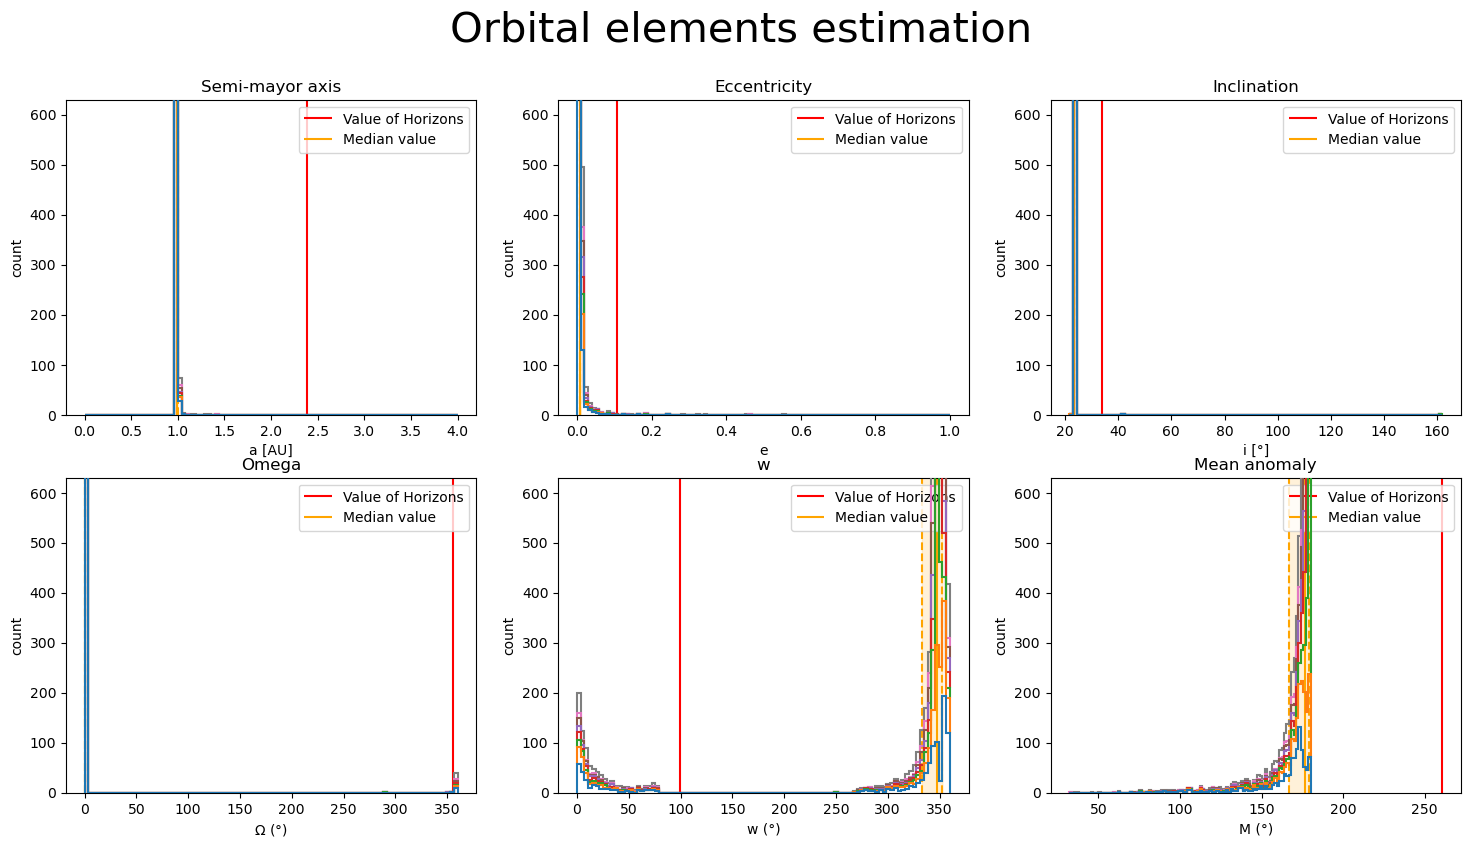

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

fig.suptitle("Orbital elements estimation", fontsize=30)

max = 630
div = 10

variables = np.zeros((N_pert, trios))
for j in range(trios):
    variables[:, j] = a_pert[int(j*N_pert):int((j+1)*N_pert)]
variable = a_pert
ax[0, 0].hist(variables, bins=N_pert // div, fill=False, zorder=10, histtype='step', linewidth=1.5, range=(0, 4), stacked=True)
ax[0, 0].vlines(3.561122907746225E+08/au, 0, max, color="red", label="Value of Horizons")
ax[0, 0].vlines(np.median(variable), 0, max, color="orange", label="Median value")
ax[0, 0].set_title("Semi-mayor axis")
ax[0, 0].fill_between(np.linspace(np.percentile(variable, 16), np.percentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[0, 0].vlines(np.percentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[0, 0].vlines(np.percentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[0, 0].set_xlabel("a [AU]")
ax[0, 0].set_ylabel("count")
ax[0, 0].set_ylim(0, max)
ax[0, 0].legend()

variables = np.zeros((N_pert, trios))
for j in range(trios):
    variables[:, j] = e_pert[int(j*N_pert):int((j+1)*N_pert)]
variable = e_pert

ax[0, 1].hist(variables, bins=N_pert // div, fill=False, zorder=10, histtype='step', linewidth=1.5, stacked=True, range=(0, 1))
ax[0, 1].vlines(1.073213502153003E-01 , 0, max, color="red", label="Value of Horizons")
ax[0, 1].vlines(np.median(variable), 0, max, color="orange", label="Median value")
ax[0, 1].set_title("Eccentricity")
ax[0, 1].fill_between(np.linspace(np.percentile(variable, 16), np.percentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[0, 1].vlines(np.percentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[0, 1].vlines(np.percentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[0, 1].set_xlabel("e")
ax[0, 1].set_ylabel("count")
ax[0, 1].set_ylim(0, max)
ax[0, 1].legend()

variables = np.zeros((N_pert, trios))
for j in range(trios):
    variables[:, j] = i_pert[int(j*N_pert):int((j+1)*N_pert)]
variable = i_pert

ax[0, 2].hist(variables, bins=N_pert // div, fill=False, zorder=10, histtype='step', linewidth=1.5, stacked=True)
ax[0, 2].vlines(3.382632520778598E+01, 0, max, color="red", label="Value of Horizons")
ax[0, 2].vlines(np.nanmedian(variable), 0, max, color="orange", label="Median value")
ax[0, 2].set_title("Inclination")
ax[0, 2].fill_between(np.linspace(np.nanpercentile(variable, 16), np.nanpercentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[0, 2].vlines(np.nanpercentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[0, 2].vlines(np.nanpercentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[0, 2].set_xlabel("i [°]")
ax[0, 2].set_ylabel("count")
ax[0, 2].set_ylim(0, max)
ax[0, 2].legend()

variables = np.zeros((N_pert, trios))
for j in range(trios):
    variables[:, j] = o_pert[int(j*N_pert):int((j+1)*N_pert)]
variable = o_pert

ax[1, 0].hist(variables, bins=N_pert // div, fill=False, zorder=10, histtype='step', linewidth=1.5, stacked=True)
ax[1, 0].vlines(3.559906031383024E+02, 0, max, color="red", label="Value of Horizons")
ax[1, 0].vlines(np.nanmedian(variable), 0, max, color="orange", label="Median value")
ax[1, 0].set_title("Omega")
ax[1, 0].fill_between(np.linspace(np.nanpercentile(variable, 16), np.nanpercentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[1, 0].vlines(np.nanpercentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[1, 0].vlines(np.nanpercentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[1, 0].set_xlabel("$\Omega$ (°)")
ax[1, 0].set_ylabel("count")
ax[1, 0].set_ylim(0, max)
ax[1, 0].legend()

variables = np.zeros((N_pert, trios))
for j in range(trios):
    variables[:, j] = w_pert[int(j*N_pert):int((j+1)*N_pert)]
variable = w_pert

ax[1, 1].hist(variables, bins=N_pert // div, fill=False, zorder=10, histtype='step', linewidth=1.5, stacked=True)
ax[1, 1].vlines(9.907360036432385E+01, 0, max, color="red", label="Value of Horizons")
ax[1, 1].vlines(np.nanmedian(variable), 0, max, color="orange", label="Median value")
ax[1, 1].set_title("w")
ax[1, 1].fill_between(np.linspace(np.nanpercentile(variable, 16), np.nanpercentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[1, 1].vlines(np.nanpercentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[1, 1].vlines(np.nanpercentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[1, 1].set_xlabel("w (°)")
ax[1, 1].set_ylabel("count")
ax[1, 1].set_ylim(0, max)
ax[1, 1].legend()

variables = np.zeros((N_pert, trios))
for j in range(trios):
    variables[:, j] = M_pert[int(j*N_pert):int((j+1)*N_pert)]
variable = M_pert
ax[1, 2].hist(variables, bins=N_pert // div, fill=False, zorder=10, histtype='step', linewidth=1.5, stacked=True)
ax[1, 2].vlines(2.607156342069317E+02, 0, max, color="red", label="Value of Horizons")
ax[1, 2].vlines(np.nanmedian(variable), 0, max, color="orange", label="Median value")
ax[1, 2].set_title("Mean anomaly")
ax[1, 2].fill_between(np.linspace(np.nanpercentile(variable, 16), np.nanpercentile(variable, 84), N_pert), 0, max, zorder=-10, alpha=0.15, color="orange")
ax[1, 2].vlines(np.nanpercentile(variable, 16), 0, max, linestyle="--", color="orange")
ax[1, 2].vlines(np.nanpercentile(variable, 84), 0, max, linestyle="--", color="orange")
ax[1, 2].set_xlabel("M (°)")
ax[1, 2].set_ylabel("count")
ax[1, 2].set_ylim(0, max)
ax[1, 2].legend()

# Time susceptibility

In [14]:
import pandas as pd
data = pd.read_csv("../DataHorizons/horizons_results.txt", header=0, delimiter="\s+", index_col=None)

t2 = Time(data.iloc[365, 0])
coord2 = SkyCoord(ra= data.iloc[365, 1]*u.deg, dec=data.iloc[365, 2] *u.deg)
N=364
a_error = np.zeros(N)
e_error = np.zeros(N)
i_error = np.zeros(N)
o_error = np.zeros(N)
w_error = np.zeros(N)
M_error = np.zeros(N)

for j in range(1, N):
    print(j)
    t1 = Time(data.iloc[365 - j, 0])
    t3 = Time(data.iloc[365 + j, 0])
    coord1 = SkyCoord(ra= data.iloc[365 - j, 1]*u.deg, dec=data.iloc[365 - j, 2] *u.deg)
    coord3 = SkyCoord(ra= data.iloc[365 + j, 1]*u.deg, dec=data.iloc[365 + j, 2] *u.deg)

    Earth = Horizons(id='399', location='500@0', epochs=[t1.jd, t2.jd, t3.jd])
    Rvectors = Earth.vectors(refplane="earth") # refplane="earth"

    R1 = np.array([Rvectors["x"][0], Rvectors["y"][0], Rvectors["z"][0]])
    R2 = np.array([Rvectors["x"][1], Rvectors["y"][1], Rvectors["z"][1]])
    R3 = np.array([Rvectors["x"][2], Rvectors["y"][2], Rvectors["z"][2]]) 

    obs_radec = np.array([coord1, coord2, coord3])
    obs_t = np.array([t1, t2, t3])
    R = np.array([R1, R2, R3])

    r1, r2, r3, v2, D, rho1, rho2, rho3, tau1, tau3, f1, g1, f3, g3, rho_1_sr, rho_2_sr, rho_3_sr = gm.gauss_method_core(obs_radec, obs_t, R, mu_Sun, r2_root_ind=0)
    r1, r2, r3, v2, rho_1_sr, rho_2_sr, rho_3_sr, f_1_new, g_1_new, f_3_new, g_3_new, refinement_success = gm.gauss_refinement(mu_Sun, tau1, tau3, r2, v2, 10**(-3), D, R, rho1, rho2, rho3, f1, g1, f3, g3)
    a, e, i, o, w, M = gm.orbital_elements(r2, v2)

    a_error[j] = np.abs((a - 2.76)/(2.76)*100)
    e_error[j] = np.abs((e - 0.08)/(0.08)*100)
    i_error[j] = np.abs((i - 27.19)/(27.19)*100)
    o_error[j] = np.abs((o - 23.35)/(23.35)*100)
    w_error[j] = np.abs((w - 132.53)/(132.53)*100)
    M_error[j] = np.abs((M - 49.63)/(49.63)*100)

1
Number of solutions =  3
Real solutions =  [2.62273517 1.1774329  1.01339554]
r2_root index =  0
 
r2_star =  2.6227351741134846
 
2
Number of solutions =  3
Real solutions =  [2.6375459  1.1757129  1.01331123]
r2_root index =  0
 
r2_star =  2.6375459020624836
 
3
Number of solutions =  3
Real solutions =  [2.64158584 1.17498673 1.01316905]
r2_root index =  0
 
r2_star =  2.6415858413273714
 
4
Number of solutions =  3
Real solutions =  [2.64574969 1.17412433 1.01296926]
r2_root index =  0
 
r2_star =  2.6457496917877723
 
5
Number of solutions =  3
Real solutions =  [2.6459963  1.17353168 1.01271095]
r2_root index =  0
 
r2_star =  2.645996299620743
 
6
Number of solutions =  3
Real solutions =  [2.64658326 1.17277456 1.01239342]
r2_root index =  0
 
r2_star =  2.6465832551778163
 
7
Number of solutions =  3
Real solutions =  [2.64681795 1.17192014 1.0120155 ]
r2_root index =  0
 
r2_star =  2.646817953646097
 
8
Number of solutions =  3
Real solutions =  [2.64677106 1.17095812 1.0

c:\Users\shermosilla\Desktop\trabajos\10_semestre\WhereIsMyRock\Codes\GaussMethod.py:403: RuntimeWarning: invalid value encountered in arccos
  E = np.arccos((1-mod_r/a)/e)


Number of solutions =  3
Real solutions =  [4.05819759 1.45369036 1.23258158]
r2_root index =  0
 
r2_star =  4.058197588302772
 
283
Number of solutions =  3
Real solutions =  [4.34280093 1.52116627 1.28673349]
r2_root index =  0
 
r2_star =  4.342800926888812
 
284
Number of solutions =  3
Real solutions =  [4.69354745 1.58106442 1.33978949]
r2_root index =  0
 
r2_star =  4.693547446301501
 
285
Number of solutions =  3
Real solutions =  [5.1319154  1.63403203 1.39224785]
r2_root index =  0
 
r2_star =  5.13191540482973
 
286
Number of solutions =  3
Real solutions =  [5.69041038 1.68071062 1.44456031]
r2_root index =  0
 
r2_star =  5.690410380090446
 
287
Number of solutions =  3
Real solutions =  [6.42094299 1.72174217 1.49715521]
r2_root index =  0
 
r2_star =  6.420942986840041
 
288
Number of solutions =  3
Real solutions =  [7.41288786 1.75773482 1.55046514]
r2_root index =  0
 
r2_star =  7.412887855886797
 
289
Number of solutions =  3
Real solutions =  [8.83278596 1.789267

c:\Users\shermosilla\Desktop\trabajos\10_semestre\WhereIsMyRock\Codes\GaussMethod.py:462: RuntimeWarning: overflow encountered in double_scalars
  denum = f_1_new*g_3_new-f_3_new*g_1_new
c:\Users\shermosilla\Desktop\trabajos\10_semestre\WhereIsMyRock\Codes\GaussMethod.py:56: RuntimeWarning: overflow encountered in cosh
  return ((np.cosh(rz)-1)/(-z))
c:\Users\shermosilla\Desktop\trabajos\10_semestre\WhereIsMyRock\Codes\GaussMethod.py:38: RuntimeWarning: overflow encountered in sinh
  return ((np.sinh(rz)-rz)/rz**3)


Number of solutions =  3
Real solutions =  [4.77919874 2.69840112 1.95858218]
r2_root index =  0
 
r2_star =  4.779198738580173
 
301
r2_star =  1.9645735203274468
 
302
r2_star =  1.9696635862418168
 
303
r2_star =  1.9739337147331004
 
304
r2_star =  1.977475231913322
 
305
r2_star =  1.9803377805532463
 
306
r2_star =  1.9825822690525425
 
307
r2_star =  1.9842659921655854
 
308
r2_star =  1.9854298809012179
 
309
r2_star =  1.9861129766620436
 
310
r2_star =  1.9863435100095652
 
311
r2_star =  1.9861652814969886
 
312
r2_star =  1.9855941387622893
 
313
r2_star =  1.9846558390429878
 
314
r2_star =  1.983377095310615
 
315
r2_star =  1.981771451980105
 
316
r2_star =  1.9798602397991094
 
317
r2_star =  1.9776569002570823
 
318
r2_star =  1.9751749759836899
 
319
r2_star =  1.9724271390185475
 
320
r2_star =  1.9694234423345918
 
321
r2_star =  1.966172946304445
 
322
r2_star =  1.962685382075664
 
323
r2_star =  1.958968452848956
 
324
r2_star =  1.9550300999055683
 
325
r2_star 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 200.0)

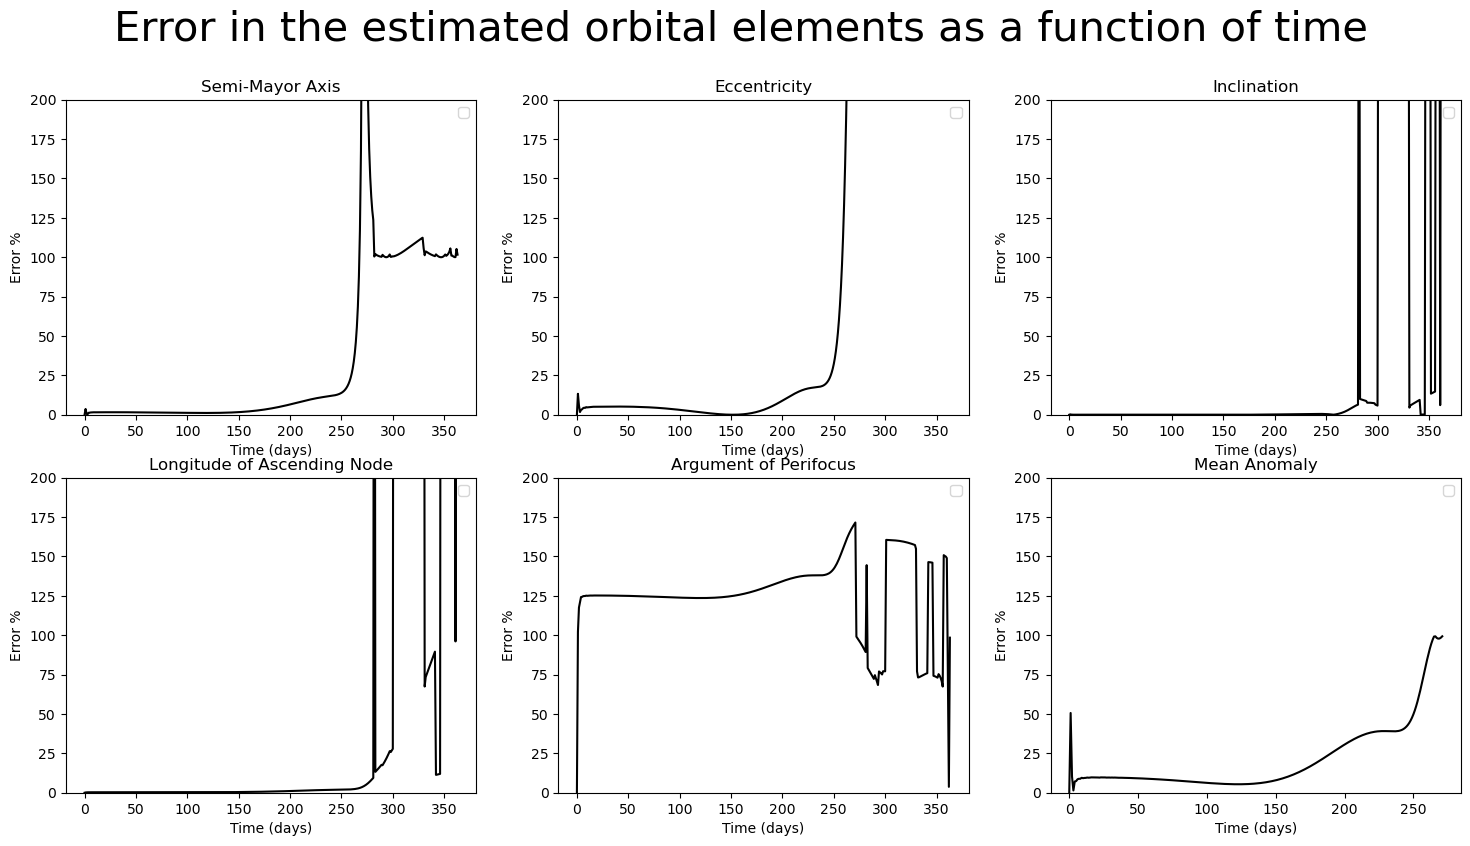

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

fig.suptitle("Error in the estimated orbital elements as a function of time", fontsize=30)

variable = a_error
ax[0, 0].plot(variable, color="k")
ax[0, 0].set_title("Semi-Mayor Axis")
ax[0, 0].set_xlabel("Time (days)")
ax[0, 0].set_ylabel("Error %")
ax[0, 0].legend()

variable = e_error
ax[0, 1].plot(variable, color="k")
ax[0, 1].set_title("Eccentricity")
ax[0, 1].set_xlabel("Time (days)")
ax[0, 1].set_ylabel("Error %")
ax[0, 1].legend()

variable = i_error
ax[0, 2].plot(variable, color="k")
ax[0, 2].set_title("Inclination")
ax[0, 2].set_xlabel("Time (days)")
ax[0, 2].set_ylabel("Error %")
ax[0, 2].legend()

variable = o_error
ax[1, 0].plot(variable, color="k")
ax[1, 0].set_title("Longitude of Ascending Node")
ax[1, 0].set_xlabel("Time (days)")
ax[1, 0].set_ylabel("Error %")
ax[1, 0].legend()

variable = w_error
ax[1, 1].plot(variable, color="k")
ax[1, 1].set_title("Argument of Perifocus")
ax[1, 1].set_xlabel("Time (days)")
ax[1, 1].set_ylabel("Error %")
ax[1, 1].legend()

variable = M_error
ax[1, 2].plot(variable, color="k")
ax[1, 2].set_title("Mean Anomaly")
ax[1, 2].set_xlabel("Time (days)")
ax[1, 2].set_ylabel("Error %")
ax[1, 2].legend()

ax[0, 0].set_ylim(0, 200)
ax[0, 1].set_ylim(0, 200)
ax[0, 2].set_ylim(0, 200)
ax[1, 0].set_ylim(0, 200)
ax[1, 1].set_ylim(0, 200)
ax[1, 2].set_ylim(0, 200)

In [17]:
import pandas as pd
data25 = pd.read_csv("../DataHorizons/horizons25.txt", header=0, delimiter="\s+", index_col=None)
data26 = pd.read_csv("../DataHorizons/horizons26.txt", header=0, delimiter="\s+", index_col=None)

t2 = Time("2023-07-26T00:00:00.000")
coord2 = SkyCoord(ra= 192.11670 *u.deg, dec=2.88845 *u.deg)
N=len(data25)
a_error = np.zeros(N)
e_error = np.zeros(N)
i_error = np.zeros(N)
o_error = np.zeros(N)
w_error = np.zeros(N)
M_error = np.zeros(N)

for j in range(N):
    print(j)
    t1 = Time("2023-07-25T" + data25.iloc[N - 1 - j, 0] + ":00.000")
    t3 = Time("2023-07-26T" + data26.iloc[j, 0] + ":00.000")
    coord1 = SkyCoord(ra= data25.iloc[N - 1 - j, 1]*u.deg, dec=data25.iloc[N - 1 - j, 2] *u.deg)
    coord3 = SkyCoord(ra= data26.iloc[j, 1]*u.deg, dec=data26.iloc[j, 2] *u.deg)

    Earth = Horizons(id='399', location='500@0', epochs=[t1.jd, t2.jd, t3.jd])
    Rvectors = Earth.vectors(refplane="earth") # refplane="earth"

    R1 = np.array([Rvectors["x"][0], Rvectors["y"][0], Rvectors["z"][0]])
    R2 = np.array([Rvectors["x"][1], Rvectors["y"][1], Rvectors["z"][1]])
    R3 = np.array([Rvectors["x"][2], Rvectors["y"][2], Rvectors["z"][2]]) 

    obs_radec = np.array([coord1, coord2, coord3])
    obs_t = np.array([t1, t2, t3])
    R = np.array([R1, R2, R3])

    r1, r2, r3, v2, D, rho1, rho2, rho3, tau1, tau3, f1, g1, f3, g3, rho_1_sr, rho_2_sr, rho_3_sr = gm.gauss_method_core(obs_radec, obs_t, R, mu_Sun, r2_root_ind=0)
    r1, r2, r3, v2, rho_1_sr, rho_2_sr, rho_3_sr, f_1_new, g_1_new, f_3_new, g_3_new, refinement_success = gm.gauss_refinement(mu_Sun, tau1, tau3, r2, v2, 10**(-3), D, R, rho1, rho2, rho3, f1, g1, f3, g3)
    a, e, i, o, w, M = gm.orbital_elements(r2, v2)

    a_error[j] = np.abs((a - 2.76)/(2.76)*100)
    e_error[j] = np.abs((e - 0.08)/(0.08)*100)
    i_error[j] = np.abs((i - 27.19)/(27.19)*100)
    o_error[j] = np.abs((o - 23.35)/(23.35)*100)
    w_error[j] = np.abs((w - 132.53)/(132.53)*100)
    M_error[j] = np.abs((M - 49.63)/(49.63)*100)

0
r2_star =  1.0125559371569346
 
1
r2_star =  1.0125598597326049
 
2
r2_star =  1.0125661007512152
 
3
r2_star =  1.012575016501277
 
4
Number of solutions =  3
Real solutions =  [28.66562665  1.02292394  1.01365289]
r2_root index =  0
 
r2_star =  28.66562665099808
 
5
r2_star =  1.012599304180527
 
6
r2_star =  1.0126147943716328
 
7
r2_star =  1.0126314905461182
 
8
r2_star =  1.0126504412408135
 
9
Number of solutions =  3
Real solutions =  [28.66759205  1.02292331  1.01365291]
r2_root index =  0
 
r2_star =  28.667592046661138
 
10
r2_star =  1.0126916548061364
 
11
r2_star =  1.0127142851383706
 
12
r2_star =  1.012736816100298
 
13
r2_star =  1.0127608707562352
 
14
Number of solutions =  3
Real solutions =  [28.66684     1.02292353  1.01365288]
r2_root index =  0
 
r2_star =  28.66684000204468
 
15
r2_star =  1.0128091508841222
 
16
r2_star =  1.0128340537485079
 
17
r2_star =  1.012857873697445
 
18


c:\Users\shermosilla\Desktop\trabajos\10_semestre\WhereIsMyRock\Codes\GaussMethod.py:403: RuntimeWarning: invalid value encountered in arccos
  E = np.arccos((1-mod_r/a)/e)


r2_star =  1.0128826306030079
 
19
r2_star =  1.0131549363998447
 
20
r2_star =  1.012930216283944
 
21
r2_star =  1.0129539972417552
 
22
r2_star =  1.0129761621527584
 
23
r2_star =  1.0129989453449442
 
24
r2_star =  1.0130888065909762
 
25
r2_star =  1.0130416294012237
 
26
r2_star =  1.0130626267061806
 
27
r2_star =  1.0129923092247153
 
28
r2_star =  1.0131015567964292
 
29
r2_star =  1.013188237334297
 
30
r2_star =  1.013137907342778
 
31
r2_star =  1.0130664340339826
 
32
r2_star =  1.0130810176120697
 
33
r2_star =  1.013188215289767
 
34
r2_star =  1.013268322228391
 
35
r2_star =  1.0131289578370755
 
36
r2_star =  1.0131459810061665
 
37
r2_star =  1.0131582894828086
 
38
r2_star =  1.0131743780149391
 
39
r2_star =  1.0133320884642192
 
40
r2_star =  1.013199376956667
 
41
r2_star =  1.013214109062114
 
42
r2_star =  1.013224315069375
 
43
r2_star =  1.0131719704119977
 
44
Number of solutions =  3
Real solutions =  [2.0103563  1.28122651 1.0133828 ]
r2_root index =  0
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 300.0)

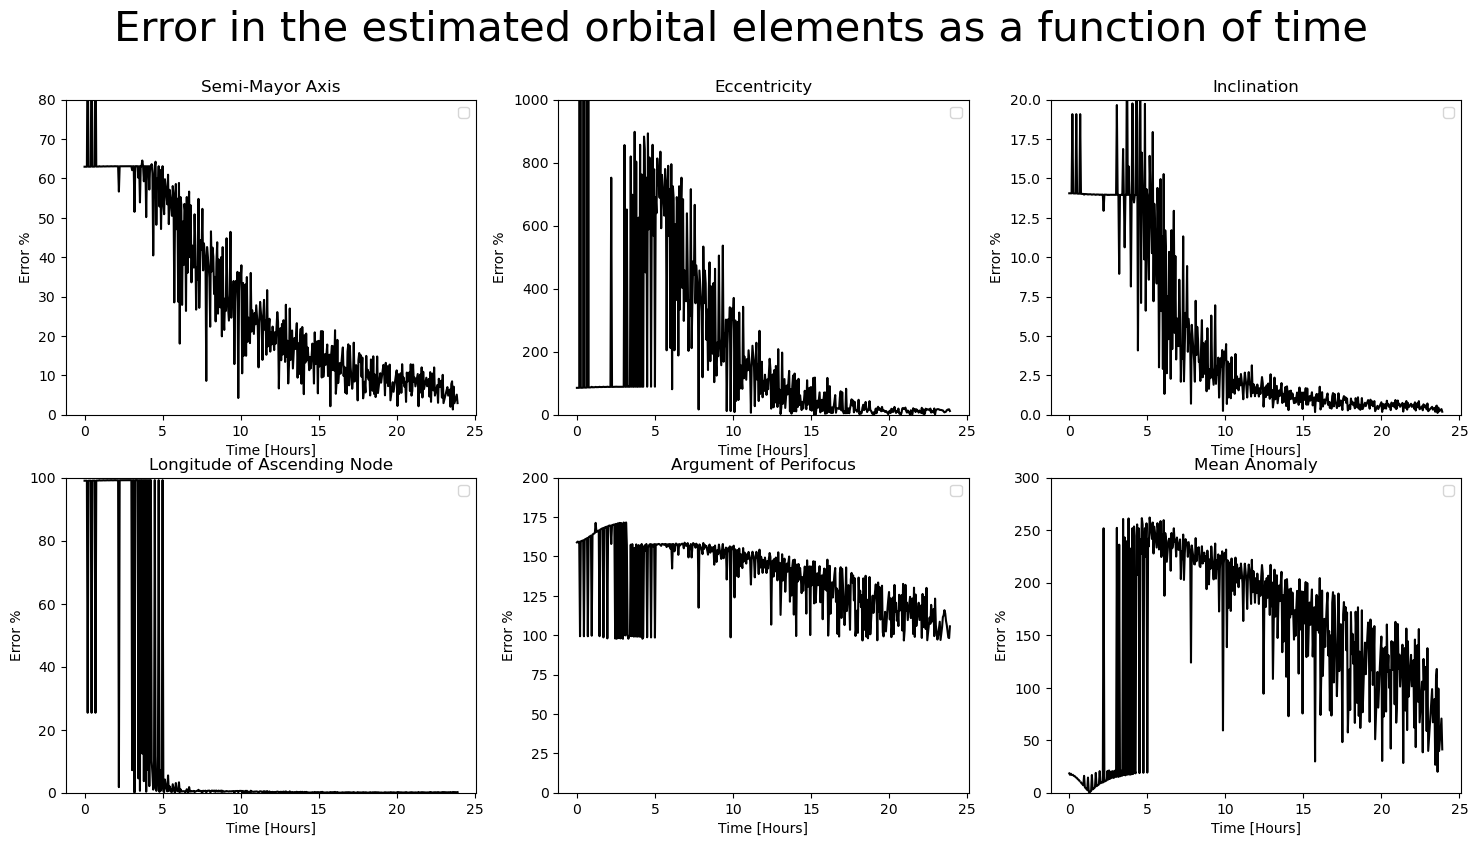

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

fig.suptitle("Error in the estimated orbital elements as a function of time", fontsize=30)

plot_time = np.arange(N)*3/60
variable = a_error
ax[0, 0].plot(plot_time, variable, color="k")
ax[0, 0].set_title("Semi-Mayor Axis")
ax[0, 0].set_xlabel("Time [Hours]")
ax[0, 0].set_ylabel("Error %")
ax[0, 0].legend()

variable = e_error
ax[0, 1].plot(plot_time, variable, color="k")
ax[0, 1].set_title("Eccentricity")
ax[0, 1].set_xlabel("Time [Hours]")
ax[0, 1].set_ylabel("Error %")
ax[0, 1].legend()

variable = i_error
ax[0, 2].plot(plot_time, variable, color="k")
ax[0, 2].set_title("Inclination")
ax[0, 2].set_xlabel("Time [Hours]")
ax[0, 2].set_ylabel("Error %")
ax[0, 2].legend()

variable = o_error
ax[1, 0].plot(plot_time, variable, color="k")
ax[1, 0].set_title("Longitude of Ascending Node")
ax[1, 0].set_xlabel("Time [Hours]")
ax[1, 0].set_ylabel("Error %")
ax[1, 0].legend()

variable = w_error
ax[1, 1].plot(plot_time, variable, color="k")
ax[1, 1].set_title("Argument of Perifocus")
ax[1, 1].set_xlabel("Time [Hours]")
ax[1, 1].set_ylabel("Error %")
ax[1, 1].legend()

variable = M_error
ax[1, 2].plot(plot_time, variable, color="k")
ax[1, 2].set_title("Mean Anomaly")
ax[1, 2].set_xlabel("Time [Hours]")
ax[1, 2].set_ylabel("Error %")
ax[1, 2].legend()

ax[0, 0].set_ylim(0, 80)
ax[0, 1].set_ylim(0, 1000)
ax[0, 2].set_ylim(0, 20)
ax[1, 0].set_ylim(0, 100)
ax[1, 1].set_ylim(0, 200)
ax[1, 2].set_ylim(0, 300)